In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
# for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

import warnings
warnings.filterwarnings("ignore")

## Step 1. Reading and Understanding the Data 

In [2]:
### 1.1 data loading

In [3]:
data = pd.read_csv("data/day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
data.shape

(730, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
data['day_of_month'] = data['dteday'].apply(lambda x: x.split('-')[0]).astype('int')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_month
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


In [8]:
columnsToDrop = ['instant', 'dteday']
data.drop(columnsToDrop, axis=1, inplace=True)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_month
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,3
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,4
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,5


In [9]:
data.day_of_month.value_counts()

1     24
2     24
28    24
27    24
26    24
25    24
24    24
23    24
22    24
21    24
20    24
19    24
18    24
17    24
16    24
15    24
14    24
13    24
12    24
11    24
10    24
9     24
8     24
7     24
6     24
5     24
4     24
3     24
29    22
30    22
31    14
Name: day_of_month, dtype: int64

### 1.1 visualizing the data

In [10]:
data.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_month
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584,1.925989e-03
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728,-1.856233e-16
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191,1.189318e-02
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764,-1.037108e-02
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534,-4.318179e-04
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542,8.520708e-03
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929,-2.617822e-02
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044,2.600883e-02
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685,1.992047e-02
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543,4.029371e-02


In [11]:
# TODO uncomment
#sns.pairplot(data)

In [12]:
all_features = data.columns
numerical_features = ['temp', 'atemp', 'hum', 'windspeed', 'casual','registered', 'cnt']
categorical_features = ['season','yr','weekday','holiday','workingday','weathersit', 'mnth','day_of_month']

In [13]:
sns.reset_orig()
''' method to visualize the relationship between numerical variable and the target variable
    rows : number of rows in the figure
    columns : number of columns in the figure
    ind_features : list of numerical variables for which relationship is to be visualized
    dep_variable : target variables
    data : dataframe
'''
def plotnumericals(rows, columns, ind_features, dep_variable, data=data):
    plt.figure(figsize=(8,5))
    for i in range(0, len(ind_features)) :
        plt.subplot(rows, columns, i+1)
        sns.regplot(data=data, x=ind_features[i],y=dep_variable, scatter_kws={'s':1})
    plt.show()

In [14]:
''' method to visualize the relationship between categorical variable and the target variable
    rows : number of rows in the figure
    columns : number of columns in the figure
    ind_features : list of categorical variables for which relationship is to be visualized
    dep_variable : target variables
    data : dataframe
'''
def addboxplots(rows, columns, ind_features, dep_variable, data=data):
    plt.figure(figsize=(15,15))
    for i in range(0, len(ind_features)) :
        plt.subplot(rows, columns, i+1)
        sns.boxplot(data=data, x=ind_features[i],y=dep_variable)
        plt.xticks(rotation=90)
    plt.show()

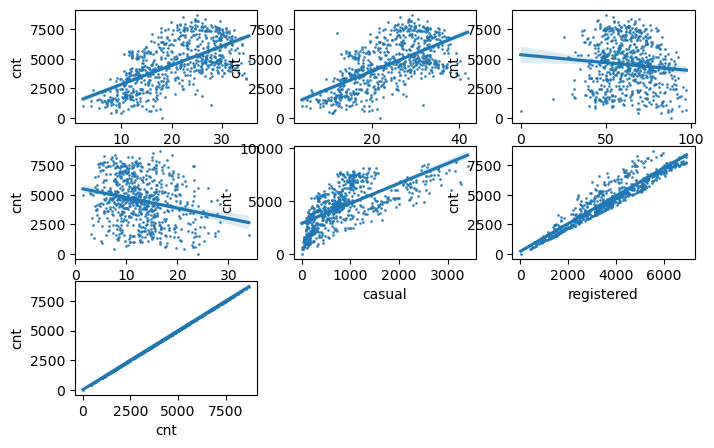

In [15]:
plotnumericals(3,3, numerical_features, 'cnt')

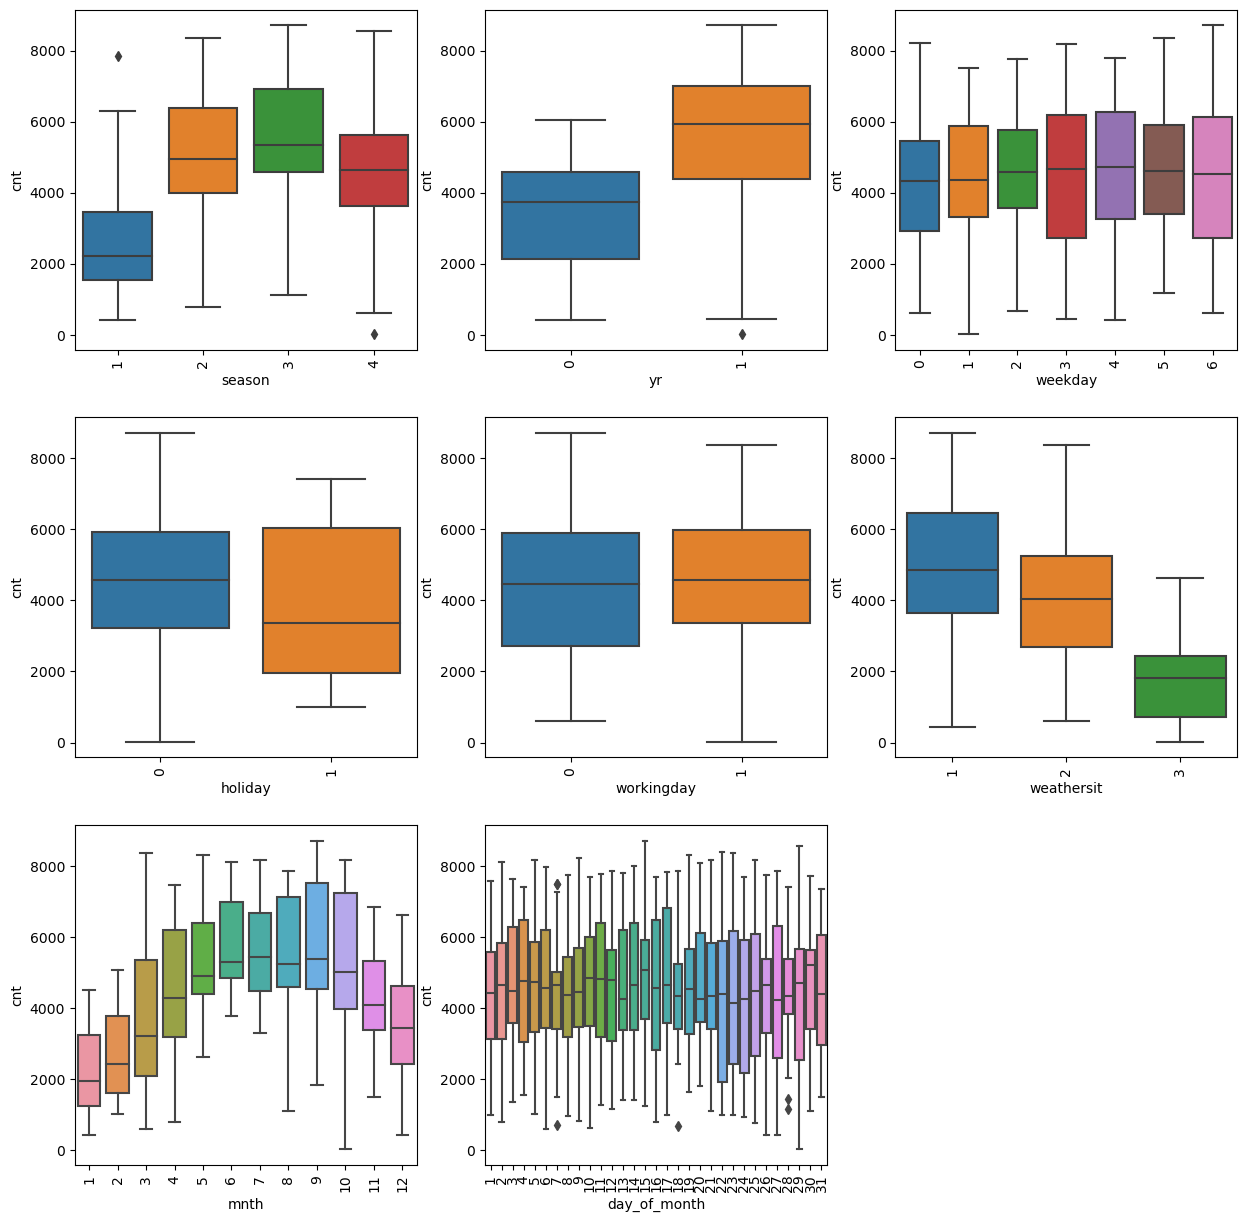

In [16]:
sns.reset_orig()

addboxplots(3,3,categorical_features, 'cnt')

In [17]:
#data['registered_percentage'] = data['registered']*100 / data['cnt']
#sns.boxplot(data, x='season',y='cnt',hue = 'registered_percentage')

data2 = data[['casual', 'registered','season','cnt']]
data2['casual'] = data2['casual']*100 / data2['cnt']
data2['registered'] = data2['registered']*100 / data2['cnt']
data2.drop(['cnt'], axis=1, inplace=True)

data3 = data2.groupby(by='season').mean()
plt.figure(figsize=(0.5,0.5))
#data3.set_index('season', inplace=True)
data3.plot(kind='bar', stacked=True, color=['red', 'pink'])

# Add Title and Labels
plt.title('season to user type%')
plt.xlabel('season')
plt.ylabel('use type % Ranges')

Text(0, 0.5, 'use type % Ranges')

In [18]:
#data['registered_percentage'] = data['registered']*100 / data['cnt']
#sns.boxplot(data, x='season',y='cnt',hue = 'registered_percentage')

data2 = data[['casual', 'registered','season','cnt']]
#data2['casual'] = data2['casual']*100 / data2['cnt']
#data2['registered'] = data2['registered']*100 / data2['cnt']
data2.drop(['cnt'], axis=1, inplace=True)

data3 = data2.groupby(by='season').sum()
plt.figure(figsize=(0.2,0.2))
#data3.set_index('season', inplace=True)
data3.plot(kind='bar', stacked=True, color=['red', 'pink'])

# Add Title and Labels
plt.title('season to user type%')
plt.xlabel('season')
plt.ylabel('use type % Ranges')

Text(0, 0.5, 'use type % Ranges')

In [19]:
''' method to visualize the relationship between categorical variable and the target variable
    rows : number of rows in the figure
    columns : number of columns in the figure
    ind_features : list of categorical variables for which relationship is to be visualized
    dep_variable : target variables
    data : dataframe
'''
def addStackedplot(rows, columns, ind_features, dep_variable, data=data):
    plt.figure(figsize=(20,11))
    for i in range(0, len(ind_features)) :
        plt.subplot(rows, columns, i+1)
        sns.boxplot(data=data, x=ind_features[i],y=dep_variable)
def stackplot(ind_feature, data=data):
    #data2 = data[['casual', 'registered','cnt',ind_feature]]
    #data3 = data2.groupby(by=ind_feature).sum()
    #data3.set_index('season', inplace=True)
    data.plot(kind='bar', stacked=True, color=['red', 'pink'])

    # Add Title and Labels
    plt.title(f"${ind_feature} to user type%")
    plt.xlabel(ind_feature)
    plt.ylabel('use type % Ranges')

## Step 2: Data preparation for modelling

In [20]:
categorical_features

['season',
 'yr',
 'weekday',
 'holiday',
 'workingday',
 'weathersit',
 'mnth',
 'day_of_month']

### 2.1 handle categorical/dummy variables

In [21]:
#season (1:spring, 2:summer, 3:fall, 4:winter)
data['season'] = data.season.apply(lambda x: 'spring' if x == 1  else ('summer' if x == 2 else ('fall' if x == 3 else ('winter' if x== 4 else 'unknown'))) )
season = pd.get_dummies(data['season'])
season.value_counts()

fall  spring  summer  winter
1     0       0       0         188
0     0       1       0         184
      1       0       0         180
      0       0       1         178
dtype: int64

In [22]:
data['weathersit'] = data.weathersit.apply(lambda x: "weathersit_"+str(x))
weathersit = pd.get_dummies(data['weathersit'])
weathersit.value_counts()

weathersit_1  weathersit_2  weathersit_3
1             0             0               463
0             1             0               246
              0             1                21
dtype: int64

In [23]:
import calendar
data['mnth'] = data['mnth'].apply(lambda x: calendar.month_abbr[x])
mnth = pd.get_dummies(data['mnth'])

In [24]:
data = pd.concat([data, season, weathersit, mnth], axis =1)
data.drop(['season','weathersit','mnth'], axis=1, inplace=True)
data.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,6,0,14.110847,18.18125,80.5833,10.749882,331,654,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,...,0,0,1,0,0,0,0,0,0,0
3,0,0,2,1,8.200000,10.60610,59.0435,10.739832,108,1454,...,0,0,1,0,0,0,0,0,0,0
4,0,0,3,1,9.305237,11.46350,43.6957,12.522300,82,1518,...,0,0,1,0,0,0,0,0,0,0


In [25]:
### 2.2 : Split the dataset into train and test

In [26]:
numerical_features

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

In [27]:
numerical_features.remove('registered')
numerical_features.remove('casual')
numerical_features.remove('atemp')

data.drop(['casual','registered','atemp'], axis=1, inplace=True)
#df_train, df_test = train_test_split(data, train_size = 0.7, random_state=100)
df_train, df_test = train_test_split(data, train_size = 0.7, random_state=37)
(df_train.shape, df_test.shape)

((510, 28), (220, 28))

### 2.3 : Rescaling the features
1. min-Max Scaling/Normalization : Between 0 and 1 [using here] : (x-xmin) / (xmax-xmin)
2. Standardization (mean =0, sigma =1) : (x - mu ) / sigma

In [28]:
# 1. instantiate an object of MinMax
scaler = MinMaxScaler()

#2. Fit MinMaxScaler on training dataset
df_train[numerical_features] = scaler.fit_transform(df_train[numerical_features])
df_train.head()

,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,day_of_month,fall,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
720,1,0,6,0,0.225205,0.453728,0.962667,0.159121,22,0,...,1,0,0,0,0,0,0,0,0,0
395,1,0,2,1,0.390362,0.428449,0.598738,0.492334,31,0,...,0,0,1,0,0,0,0,0,0,0
553,1,0,0,0,0.965639,0.589974,0.258169,0.512013,8,1,...,0,0,0,1,0,0,0,0,0,0
112,0,0,6,0,0.483470,0.913025,0.520985,0.435229,23,0,...,0,0,0,0,0,0,0,0,0,0
417,1,0,3,1,0.398120,0.583976,0.530353,0.524206,22,0,...,0,1,0,0,0,0,0,0,0,0


In [29]:
df_train[numerical_features].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.521712,0.641881,0.424117,0.490588
std,0.240204,0.146369,0.188015,0.226461
min,0.000000,0.000000,0.000000,0.000000
25%,0.312217,0.533042,0.286237,0.339672
50%,0.500097,0.640317,0.400445,0.489436
75%,0.735085,0.743359,0.530222,0.659574
max,1.000000,1.000000,1.000000,1.000000


In [30]:
# apply same set of transformations on test dataset
df_test[numerical_features] = scaler.transform(df_test[numerical_features])
df_test.describe()

,yr,holiday,weekday,workingday,temp,hum,windspeed,cnt,day_of_month,fall,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.477273,0.009091,3.318182,0.695455,0.551906,0.653558,0.411776,0.495982,15.827273,0.300000,...,0.077273,0.077273,0.077273,0.090909,0.095455,0.095455,0.100000,0.050000,0.077273,0.104545
std,0.500622,0.095128,1.948805,0.461264,0.250363,0.146486,0.207186,0.250277,8.989958,0.459303,...,0.267633,0.267633,0.267633,0.288135,0.294512,0.294512,0.300684,0.218442,0.267633,0.306665
min,0.000000,0.000000,0.000000,0.000000,-0.049735,0.193231,0.057548,-0.049378,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,0.328012,0.538239,0.262707,0.300918,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,1.000000,0.592699,0.658312,0.384899,0.507183,15.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,5.000000,1.000000,0.781639,0.759640,0.518245,0.704998,24.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,6.000000,1.000000,1.017736,0.976435,1.213032,0.980804,31.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step 3. Training the Linear regression model

In [31]:
#plt.figure(figsize = (16,10))
#sns.heatmap(df_train.corr(), annot=True, cmap = 'YlGnBu')
#plt.show()
        

In [32]:
def plot_cluster(columns, df = data, font_size=2):
    """
        Parameters:
            columns: columns to be considered for crrelation
            df: dataframe, defaulted to loan
            font_size : size defaulted to 2
        Returns:
            None, does a clustermap plot
    """
    dfToCorr = df[columns]
    df_corr = dfToCorr.corr()
    
    sns.set(font_scale=font_size)
    cmap = sns.diverging_palette(h_neg=210, h_pos=350, s=90, l=30, as_cmap=True)
    sns.clustermap(df_corr, annot=True, figsize=(30, 20),cmap="BrBG")

In [33]:
columnsToCorr1 = df_train.columns.difference({'day_of_month','registered','casual', 'atemp'}).to_list()
plot_cluster(columnsToCorr1, df_train.corr(), 1.7)

In [34]:
# x_train, y_train
y_train, X_train = df_train.pop('cnt'), df_train
# train test for model 1
y_train1, X_train1 = y_train, X_train
# train test for model 2
y_train2, X_train2 = y_train, X_train

- statistical significance of the variable
- VIF comparison

In [35]:
def buildAndTrainModel(ind_vars, data = X_train, target = y_train):
    # filter the subset of columns from original df_train set
    data_sm = data[ind_vars]
    # add constant
    data_sm = sm.add_constant(data_sm)
    # create the model
    lr = sm.OLS(target, data_sm)
    # fit the model
    lr_model = lr.fit()
    # print params
    print((lr_model.params, lr_model.summary()))
    return lr_model

In [36]:
def calculateVIF(data):
    vif = pd.DataFrame()
    vif['Features'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending= False)
    print(vif)

In [37]:
### Step 3.1 : Approach 1 : Starting with all columns ad manually reducing the feature set based on pvalues and VIF scores

In [38]:
buildAndTrainModel(list(X_train.columns), X_train, y_train)

(const           0.133830
yr              0.241311
holiday        -0.046638
weekday         0.008054
workingday      0.019260
temp            0.400694
hum            -0.159151
windspeed      -0.136333
day_of_month   -0.000635
fall            0.019641
spring         -0.061627
summer          0.068949
winter          0.106866
weathersit_1    0.139346
weathersit_2    0.085616
weathersit_3   -0.091132
Apr             0.000825
Aug             0.027930
Dec            -0.031396
Feb            -0.012932
Jan            -0.035582
Jul             0.006352
Jun             0.015357
Mar             0.001779
May             0.019865
Nov            -0.017383
Oct             0.059491
Sep             0.099524
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.84

1. atemp, mnth, day_of_month are having high p values and can be considered for removal
before that lets look at VIF
2. 
A> All high : 
1. High p value, High VIF  : remove the feature
B> High -Lows : 
2. High p value, Low VIF   : remove these first : and then 3
3. Low p value , High VIF  : 
C> All lows : 
4. Low p value, Low VIF    :  keep

atemp has highest p value from the model summary output
as well as higher VIF value too,
So lets remove the atemp variable and verify the VIF values for remaining vars

In [39]:
# cat 1 : all Highs
buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const           0.133830
yr              0.241311
holiday        -0.046638
weekday         0.008054
workingday      0.019260
temp            0.400694
hum            -0.159151
windspeed      -0.136333
day_of_month   -0.000635
fall            0.019641
spring         -0.061627
summer          0.068949
winter          0.106866
weathersit_1    0.139346
weathersit_2    0.085616
weathersit_3   -0.091132
Apr             0.000825
Aug             0.027930
Dec            -0.031396
Feb            -0.012932
Jan            -0.035582
Jul             0.006352
Jun             0.015357
Mar             0.001779
May             0.019865
Nov            -0.017383
Oct             0.059491
Sep             0.099524
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.84

In [40]:
## observations : removing atemp has not impacted the r squared value at all 

In [41]:
# fall :  cat 1 : all Highs
X_train1 = X_train1.drop(['fall'], axis=1)
buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const           0.147694
yr              0.241311
holiday        -0.046638
weekday         0.008054
workingday      0.019260
temp            0.400694
hum            -0.159151
windspeed      -0.136333
day_of_month   -0.000635
spring         -0.081268
summer          0.049308
winter          0.087225
weathersit_1    0.143967
weathersit_2    0.090238
weathersit_3   -0.086511
Apr             0.001980
Aug             0.029086
Dec            -0.030241
Feb            -0.011776
Jan            -0.034427
Jul             0.007507
Jun             0.016513
Mar             0.002935
May             0.021020
Nov            -0.016228
Oct             0.060646
Sep             0.100680
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                

In [42]:
## observations : removing fall has not impacted the r squared value at all 

In [43]:
# day_of_month :  cat 1 : all Highs
X_train1 = X_train1.drop(['day_of_month'], axis=1)
buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const           0.144444
yr              0.241518
holiday        -0.046425
weekday         0.008101
workingday      0.018785
temp            0.399216
hum            -0.164469
windspeed      -0.138426
spring         -0.080662
summer          0.047697
winter          0.089653
weathersit_1    0.142081
weathersit_2    0.089257
weathersit_3   -0.086894
Apr             0.002898
Aug             0.029496
Dec            -0.032898
Feb            -0.012388
Jan            -0.036317
Jul             0.007555
Jun             0.018988
Mar             0.002336
May             0.023313
Nov            -0.018387
Oct             0.058209
Sep             0.101638
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statis

In [44]:
## observations : removing day_of_month has not impacted the r squared value at all 

In [45]:
# Jul :  cat 1 : all Highs
X_train1 = X_train1.drop(['Jul'], axis=1)
buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const           0.150110
yr              0.241518
holiday        -0.046425
weekday         0.008101
workingday      0.018785
temp            0.399216
hum            -0.164469
windspeed      -0.138426
spring         -0.080662
summer          0.047697
winter          0.089653
weathersit_1    0.143970
weathersit_2    0.091146
weathersit_3   -0.085005
Apr            -0.004657
Aug             0.021941
Dec            -0.040453
Feb            -0.019943
Jan            -0.043872
Jun             0.011433
Mar            -0.005219
May             0.015758
Nov            -0.025942
Oct             0.050654
Sep             0.094083
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     

In [46]:
# remove Feb : 
X_train1 = X_train1.drop(['Feb'], axis=1)
buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const           0.144177
yr              0.241174
holiday        -0.047105
weekday         0.008080
workingday      0.018338
temp            0.409021
hum            -0.167001
windspeed      -0.139000
spring         -0.090538
summer          0.042235
winter          0.083343
weathersit_1    0.141631
weathersit_2    0.089127
weathersit_3   -0.086581
Apr             0.006358
Aug             0.024567
Dec            -0.025272
Jan            -0.025407
Jun             0.018524
Mar             0.009701
May             0.025514
Nov            -0.012660
Oct             0.062483
Sep             0.099408
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     127.2
Date:              

In [47]:
# Jul :  
X_train1 = X_train1.drop(['Nov'], axis=1)
buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const           0.142289
yr              0.241170
holiday        -0.048193
weekday         0.008033
workingday      0.018291
temp            0.412624
hum            -0.168620
windspeed      -0.140003
spring         -0.089493
summer          0.042948
winter          0.076162
weathersit_1    0.140909
weathersit_2    0.088727
weathersit_3   -0.087347
Apr             0.008015
Aug             0.025783
Dec            -0.017957
Jan            -0.022986
Jun             0.019244
Mar             0.011518
May             0.026663
Oct             0.072008
Sep             0.102766
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     133.4
Date:                Tue, 07 Feb 2023   Prob

In [48]:
# Dec :  
X_train1 = X_train1.drop(['Dec'], axis=1)
buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const           0.139182
yr              0.240964
holiday        -0.048085
weekday         0.008098
workingday      0.018483
temp            0.419199
hum            -0.172632
windspeed      -0.138545
spring         -0.090327
summer          0.042831
winter          0.073797
weathersit_1    0.139477
weathersit_2    0.087187
weathersit_3   -0.087481
Apr             0.010791
Aug             0.026879
Jan            -0.017386
Jun             0.020414
Mar             0.015531
May             0.029107
Oct             0.077505
Sep             0.105379
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     140.0
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          

In [49]:
# Apr :  
X_train1 = X_train1.drop(['Apr'], axis=1)
buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const           0.139927
yr              0.241003
holiday        -0.048217
weekday         0.008120
workingday      0.018400
temp            0.420109
hum            -0.173638
windspeed      -0.138211
spring         -0.089756
summer          0.050214
winter          0.073214
weathersit_1    0.139487
weathersit_2    0.087354
weathersit_3   -0.086913
Aug             0.025840
Jan            -0.018530
Jun             0.013672
Mar             0.011514
May             0.020884
Oct             0.077327
Sep             0.104614
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     147.6
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          9.12e-189
Time:          

In [50]:
# Jun :  
X_train1 = X_train1.drop(['Jun'], axis=1)
buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const           0.136952
yr              0.240808
holiday        -0.049299
weekday         0.008169
workingday      0.018123
temp            0.430712
hum            -0.176231
windspeed      -0.139491
spring         -0.085840
summer          0.055505
winter          0.075837
weathersit_1    0.138152
weathersit_2    0.086495
weathersit_3   -0.087695
Aug             0.023723
Jan            -0.018045
Mar             0.009493
May             0.015304
Oct             0.075748
Sep             0.103378
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          9.34e-190
Time:                        16:37:26   

In [51]:
# Mar :  
X_train1 = X_train1.drop(['Mar'], axis=1)
buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const           0.139113
yr              0.240724
holiday        -0.050122
weekday         0.008157
workingday      0.018096
temp            0.429487
hum            -0.178347
windspeed      -0.139668
spring         -0.083634
summer          0.056721
winter          0.075291
weathersit_1    0.138384
weathersit_2    0.087250
weathersit_3   -0.086521
Aug             0.023731
Jan            -0.021095
May             0.013989
Oct             0.075991
Sep             0.103453
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.3
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          8.46e-191
Time:                        16:37:26   Log-Likelihood:          

In [52]:
# May :  
X_train1 = X_train1.drop(['May'], axis=1)
buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const           0.134569
yr              0.240589
holiday        -0.049490
weekday         0.008167
workingday      0.018244
temp            0.432725
hum            -0.173295
windspeed      -0.140496
spring         -0.081623
summer          0.061779
winter          0.076611
weathersit_1    0.137541
weathersit_2    0.085758
weathersit_3   -0.088730
Aug             0.023585
Jan            -0.020858
Oct             0.075358
Sep             0.103141
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     175.7
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          8.64e-192
Time:                        16:37:26   Log-Likelihood:                 519.41
No. Observa

In [53]:
# spring :  
X_train1 = X_train1.drop(['spring'], axis=1)
buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const           0.077478
yr              0.237978
holiday        -0.053967
weekday         0.008400
workingday      0.015203
temp            0.516979
hum            -0.185702
windspeed      -0.144945
summer          0.103342
winter          0.133929
weathersit_1    0.115464
weathersit_2    0.064723
weathersit_3   -0.102709
Aug             0.046444
Jan            -0.027913
Oct             0.065471
Sep             0.124360
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     182.1
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          3.88e-190
Time:                        16:37:26   Log-Likelihood:                 512.73
No. Observations:                 51

In [54]:
# weathersit_1 :  
X_train1 = X_train1.drop(['weathersit_1'], axis=1)
buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const           0.192942
yr              0.237978
holiday        -0.053967
weekday         0.008400
workingday      0.015203
temp            0.516979
hum            -0.185702
windspeed      -0.144945
summer          0.103342
winter          0.133929
weathersit_2   -0.050742
weathersit_3   -0.218173
Aug             0.046444
Jan            -0.027913
Oct             0.065471
Sep             0.124360
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     182.1
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          3.88e-190
Time:                        16:37:26   Log-Likelihood:                 512.73
No. Observations:                 510   AIC:                 

In [55]:
# hum :  
X_train1 = X_train1.drop(['hum'], axis=1)
buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const           0.084658
yr              0.242793
holiday        -0.053328
weekday         0.009233
workingday      0.018168
temp            0.490932
windspeed      -0.115744
summer          0.101874
winter          0.123568
weathersit_2   -0.081815
weathersit_3   -0.268647
Aug             0.043828
Jan            -0.034830
Oct             0.063460
Sep             0.113218
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.7
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          3.60e-186
Time:                        16:37:26   Log-Likelihood:                 500.53
No. Observations:                 510   AIC:                            -971.1
Df Resi

In [56]:
# workingday :  
X_train1 = X_train1.drop(['workingday'], axis=1)
buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const           0.096212
yr              0.242449
holiday        -0.065530
weekday         0.009635
temp            0.493503
windspeed      -0.118523
summer          0.101864
winter          0.123303
weathersit_2   -0.081019
weathersit_3   -0.267125
Aug             0.042547
Jan            -0.033594
Oct             0.061982
Sep             0.112964
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.5
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          1.72e-186
Time:                        16:37:26   Log-Likelihood:                 498.53
No. Observations:                 510   AIC:                            -969.1
Df Residuals:                   

In [57]:
# Oct : 
X_train1 = X_train1.drop(['Oct'], axis=1)
buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const           0.086697
yr              0.241671
holiday        -0.064284
weekday         0.009778
temp            0.511121
windspeed      -0.116342
summer          0.099429
winter          0.145728
weathersit_2   -0.079678
weathersit_3   -0.266685
Aug             0.036294
Jan            -0.029148
Sep             0.103789
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.0
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          5.69e-185
Time:                        16:37:26   Log-Likelihood:                 492.14
No. Observations:                 510   AIC:                            -958.3
Df Residuals:                     497   BIC:             

In [58]:
# Aug :  
X_train1 = X_train1.drop(['Aug'], axis=1)
buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const           0.084472
yr              0.240677
holiday        -0.066595
weekday         0.009783
temp            0.528689
windspeed      -0.114963
summer          0.090645
winter          0.140586
weathersit_2   -0.078189
weathersit_3   -0.268089
Jan            -0.030854
Sep             0.094389
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     225.1
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          2.86e-185
Time:                        16:37:27   Log-Likelihood:                 490.04
No. Observations:                 510   AIC:                            -956.1
Df Residuals:                     498   BIC:                            -905.3
Df 

In [59]:
# Jan :  
X_train1 = X_train1.drop(['Jan'], axis=1)
buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const           0.069224
yr              0.239796
holiday        -0.067943
weekday         0.009817
temp            0.545597
windspeed      -0.113099
summer          0.095372
winter          0.148131
weathersit_2   -0.078026
weathersit_3   -0.268533
Sep             0.095859
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.3
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          8.15e-186
Time:                        16:37:27   Log-Likelihood:                 488.47
No. Observations:                 510   AIC:                            -954.9
Df Residuals:                     499   BIC:                            -908.4
Df Model:                   

In [60]:
# holiday : 
X_train1 = X_train1.drop(['holiday'], axis=1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train)
calculateVIF(X_train1)

(const           0.063788
yr              0.240153
weekday         0.010609
temp            0.547882
windspeed      -0.115506
summer          0.096002
winter          0.148330
weathersit_2   -0.077637
weathersit_3   -0.265212
Sep             0.094016
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     268.2
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          4.98e-185
Time:                        16:37:27   Log-Likelihood:                 483.72
No. Observations:                 510   AIC:                            -947.4
Df Residuals:                     500   BIC:                            -905.1
Df Model:                           9                

In [61]:
# weekday :  
X_train1 = X_train1.drop(['weekday'], axis=1)
lr_model1 = buildAndTrainModel(list(X_train1.columns), X_train1, y_train1)
calculateVIF(X_train1)

(const           0.093700
yr              0.240337
temp            0.545839
windspeed      -0.111067
summer          0.093180
winter          0.146942
weathersit_2   -0.076342
weathersit_3   -0.264067
Sep             0.095763
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     284.4
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          8.06e-181
Time:                        16:37:27   Log-Likelihood:                 470.88
No. Observations:                 510   AIC:                            -923.8
Df Residuals:                     501   BIC:                            -885.6
Df Model:                           8                                         

In [62]:
# windspeed :  cat 1 : all Highs
#X_train1 = X_train1.drop(['windspeed'], axis=1)
#lr_model =  buildAndTrainModel(list(X_train1.columns), X_train1, y_train)
##calculateVIF(X_train1)

In [63]:
# Model 1 : Manually processed regression model :
X_train1 # dataset with reduced columns
lr_model1.summary() # model 1
calculateVIF(X_train1)

       Features   VIF
1          temp  3.74
2     windspeed  3.48
0            yr  1.99
3        summer  1.63
5  weathersit_2  1.48
4        winter  1.37
7           Sep  1.19
6  weathersit_3  1.07


In [64]:
# Step  3.2 : RFE : Reduce the feature set using an RFE and then manually reduce it further

In [65]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor

In [66]:
# Exploring RFECV, however RFE will be used 
rfecv = RFECV(estimator=DecisionTreeRegressor())
# fit RFE
rfecv.fit(X_train2, y_train2)
cols = X_train2.columns
# summarize all features
for i in range(X_train2.shape[1]):
 print('Column: %s, Selected %s, Rank: %.3f' % (cols[i], rfecv.support_[i], rfecv.ranking_[i]))

Column: yr, Selected True, Rank: 1.000
Column: holiday, Selected True, Rank: 1.000
Column: weekday, Selected True, Rank: 1.000
Column: workingday, Selected True, Rank: 1.000
Column: temp, Selected True, Rank: 1.000
Column: hum, Selected True, Rank: 1.000
Column: windspeed, Selected True, Rank: 1.000
Column: day_of_month, Selected True, Rank: 1.000
Column: fall, Selected True, Rank: 1.000
Column: spring, Selected True, Rank: 1.000
Column: summer, Selected True, Rank: 1.000
Column: winter, Selected True, Rank: 1.000
Column: weathersit_1, Selected True, Rank: 1.000
Column: weathersit_2, Selected True, Rank: 1.000
Column: weathersit_3, Selected True, Rank: 1.000
Column: Apr, Selected True, Rank: 1.000
Column: Aug, Selected False, Rank: 2.000
Column: Dec, Selected True, Rank: 1.000
Column: Feb, Selected False, Rank: 3.000
Column: Jan, Selected True, Rank: 1.000
Column: Jul, Selected True, Rank: 1.000
Column: Jun, Selected True, Rank: 1.000
Column: Mar, Selected True, Rank: 1.000
Column: May

In [67]:
#Option 3 : iteratively removing features using RFE

In [68]:
from sklearn.linear_model import LinearRegression
def runRFE(n_features_to_select, data = X_train2, target = y_train2):
    # Construct our Linear Regression model
    lr = LinearRegression()
    lr.fit(data, target)
#    rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=n_features_to_select,step=10)
    rfe = RFE(lr, n_features_to_select=n_features_to_select,step=10, verbose =3)
    # fit RFE
    rfe.fit(data, target)
    # summarize all features
    cols = data.columns
    for i in range(data.shape[1]):
        print('Column: %s, Selected %s, Rank: %.3f' % (cols[i], rfe.support_[i], rfe.ranking_[i]))
    return rfe

In [69]:
def removeUnsupportedColumns(rfe, data):
    keep_list = rfe.support_
    columnsToRemove = data.columns.values[np.logical_not(keep_list)]
    d = data.drop(columns=columnsToRemove)
    return d

In [70]:
# 
buildAndTrainModel(list(X_train2.columns), X_train2, y_train2)
calculateVIF(X_train2)

(const           0.133830
yr              0.241311
holiday        -0.046638
weekday         0.008054
workingday      0.019260
temp            0.400694
hum            -0.159151
windspeed      -0.136333
day_of_month   -0.000635
fall            0.019641
spring         -0.061627
summer          0.068949
winter          0.106866
weathersit_1    0.139346
weathersit_2    0.085616
weathersit_3   -0.091132
Apr             0.000825
Aug             0.027930
Dec            -0.031396
Feb            -0.012932
Jan            -0.035582
Jul             0.006352
Jun             0.015357
Mar             0.001779
May             0.019865
Nov            -0.017383
Oct             0.059491
Sep             0.099524
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.84

In [71]:
X_train2 = X_train
#Based on manual analysis done eariler, removing some 'hum'
X_train2= X_train2.drop(['hum'], axis=1)
rfe = runRFE(7, X_train2, y_train2)
X_train2 = removeUnsupportedColumns(rfe, X_train2)

lr_model2 = buildAndTrainModel(list(X_train2.columns), X_train2, y_train2)
calculateVIF(X_train2)

Fitting estimator with 26 features.
Fitting estimator with 16 features.
Column: yr, Selected True, Rank: 1.000
Column: holiday, Selected False, Rank: 2.000
Column: weekday, Selected False, Rank: 3.000
Column: workingday, Selected False, Rank: 3.000
Column: temp, Selected True, Rank: 1.000
Column: windspeed, Selected True, Rank: 1.000
Column: day_of_month, Selected False, Rank: 3.000
Column: fall, Selected False, Rank: 3.000
Column: spring, Selected True, Rank: 1.000
Column: summer, Selected False, Rank: 2.000
Column: winter, Selected True, Rank: 1.000
Column: weathersit_1, Selected True, Rank: 1.000
Column: weathersit_2, Selected False, Rank: 2.000
Column: weathersit_3, Selected True, Rank: 1.000
Column: Apr, Selected False, Rank: 3.000
Column: Aug, Selected False, Rank: 3.000
Column: Dec, Selected False, Rank: 2.000
Column: Feb, Selected False, Rank: 2.000
Column: Jan, Selected False, Rank: 2.000
Column: Jul, Selected False, Rank: 3.000
Column: Jun, Selected False, Rank: 3.000
Column:

In [72]:
X_train3, y_train3  = X_train, y_train

#X_train3= X_train3.drop(['weathersit_3','Sep','windspeed','winter'], axis=1)
X_train3= X_train3.drop(['hum'], axis=1)

#identify highly correlated variables 
cor_matrix = X_train3.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] >= 0.40)]
print('highly correlated variables : ',to_drop)

X_train3 = X_train3.drop(to_drop, axis=1)

highly correlated variables :  ['fall', 'spring', 'weathersit_2', 'Apr', 'Aug', 'Feb', 'Jan', 'Jul', 'May', 'Nov', 'Oct']


In [73]:
# use RFE to select 11 features
rfe = runRFE(11, X_train3, y_train3)
X_train3 = removeUnsupportedColumns(rfe, X_train3)
lr_model3 = buildAndTrainModel(list(X_train3.columns), X_train3, y_train3)
calculateVIF(X_train3)

Fitting estimator with 15 features.
Column: yr, Selected True, Rank: 1.000
Column: holiday, Selected True, Rank: 1.000
Column: weekday, Selected False, Rank: 2.000
Column: workingday, Selected True, Rank: 1.000
Column: temp, Selected True, Rank: 1.000
Column: windspeed, Selected True, Rank: 1.000
Column: day_of_month, Selected False, Rank: 2.000
Column: summer, Selected True, Rank: 1.000
Column: winter, Selected True, Rank: 1.000
Column: weathersit_1, Selected True, Rank: 1.000
Column: weathersit_3, Selected True, Rank: 1.000
Column: Dec, Selected True, Rank: 1.000
Column: Jun, Selected False, Rank: 2.000
Column: Mar, Selected False, Rank: 2.000
Column: Sep, Selected True, Rank: 1.000
(const           0.016201
yr              0.240267
holiday        -0.067249
workingday      0.019152
temp            0.532610
windspeed      -0.110305
summer          0.090532
winter          0.152326
weathersit_1    0.076471
weathersit_3   -0.194423
Dec            -0.037326
Sep             0.095142
dtype

In [74]:
# refine the above model considering pvalue and VIF scores
X_train3 = X_train3.drop(['Dec','workingday','holiday'], axis=1)
rfe = runRFE(11, X_train3, y_train3)
X_train3 = removeUnsupportedColumns(rfe, X_train3)
lr_model3 = buildAndTrainModel(list(X_train3.columns), X_train3, y_train3)
calculateVIF(X_train3)

Column: yr, Selected True, Rank: 1.000
Column: temp, Selected True, Rank: 1.000
Column: windspeed, Selected True, Rank: 1.000
Column: summer, Selected True, Rank: 1.000
Column: winter, Selected True, Rank: 1.000
Column: weathersit_1, Selected True, Rank: 1.000
Column: weathersit_3, Selected True, Rank: 1.000
Column: Sep, Selected True, Rank: 1.000
(const           0.017358
yr              0.240337
temp            0.545839
windspeed      -0.111067
summer          0.093180
winter          0.146942
weathersit_1    0.076342
weathersit_3   -0.187725
Sep             0.095763
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     284.4
Date:                Tue, 07 Feb 2023   Prob

## Step 4 : Residual Analysis & Assumptions verification

In [75]:
sns.reset_orig()
def predictUsingSM(model, data):
    # filter the subset of columns from original df_train set
    data_sm = data[data.columns]
    # add constant
    data_sm = sm.add_constant(data_sm)
    y_train1_pred = model.predict(data_sm)
    return y_train1_pred
def calculateResidue(y, y_pred):
    return y - y_pred
def plotResidual(y, y_pred, rows, columns, index):
    print("Analysis 1: Residual Plot : \n Values Should be normally distributed")
    res = calculateResidue(y, y_pred)
    plt.figure(figsize=(4,2))
    sns.displot(res)
    plt.title("1. Error Terms")
    plt.xlabel('Errors')
    plt.show()

def verifyIndependanceOfResiduals(y, y_pred):
     print("Analysis 2. Independence of residuals \n durbin_watson : ", durbin_watson(calculateResidue(y, y_pred)))
        
def verifyHomoscedasticity(data, y, y_pred, rows, columns, index):
    print("Analysis 3 : Homoscedasticity : \n Should not see any patterns in below scatterplot..")
    res =   calculateResidue(y, y_pred)
    plt.figure(figsize=(4,2))
    plt.scatter(y, res)
    plt.plot(y,(y - y), '-r')
    plt.title("2. Homoscedasticity")
    plt.xlabel('Count')
    plt.ylabel('Residual')
    plt.show()

def verifyLinearity(rows, columns, model, features):
    plt.figure(figsize=(5,5))
    fig = plt.figure(figsize=(rows,columns))
    sm.graphics.plot_ccpr_grid(model, fig=fig)
    plt.title("Analysis 4.Linearity")
    
    plt.show()

def verifyMultiColinearity(data, rows, columns, index):
    calculateVIF(data)
    plt.figure(figsize=(5,5))
    sns.heatmap(data.corr(),annot = True, cmap="RdYlGn")
    plt.title("Analysis 5. MultiColinearity")
    plt.show()

def residualAnalysis(model, data, target):
    target_pred = predictUsingSM(model, data )
    plotResidual(target, target_pred, 3,1, 1) 
    verifyIndependanceOfResiduals(target, target_pred)
    verifyHomoscedasticity(data, target, target_pred,3,1, 2)
    verifyMultiColinearity(data,3,1, 3)
    verifyLinearity(11,11, model, data.columns)
    

Analysis 1: Residual Plot : 
 Values Should be normally distributed


<Figure size 50x50 with 0 Axes>

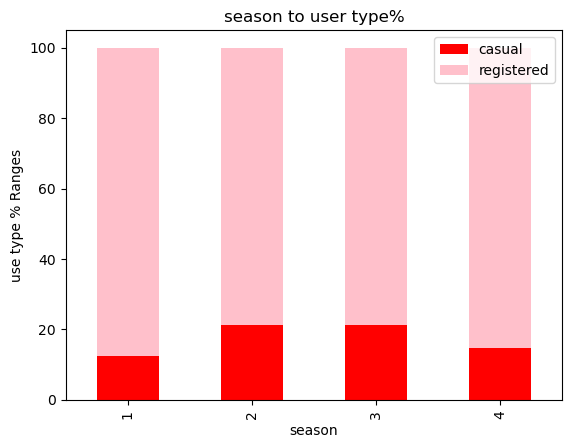

<Figure size 20x20 with 0 Axes>

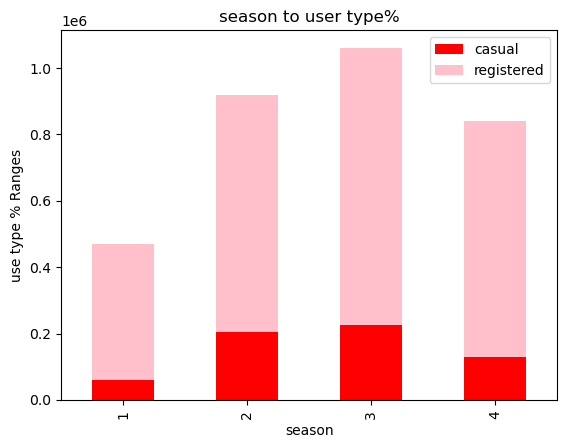

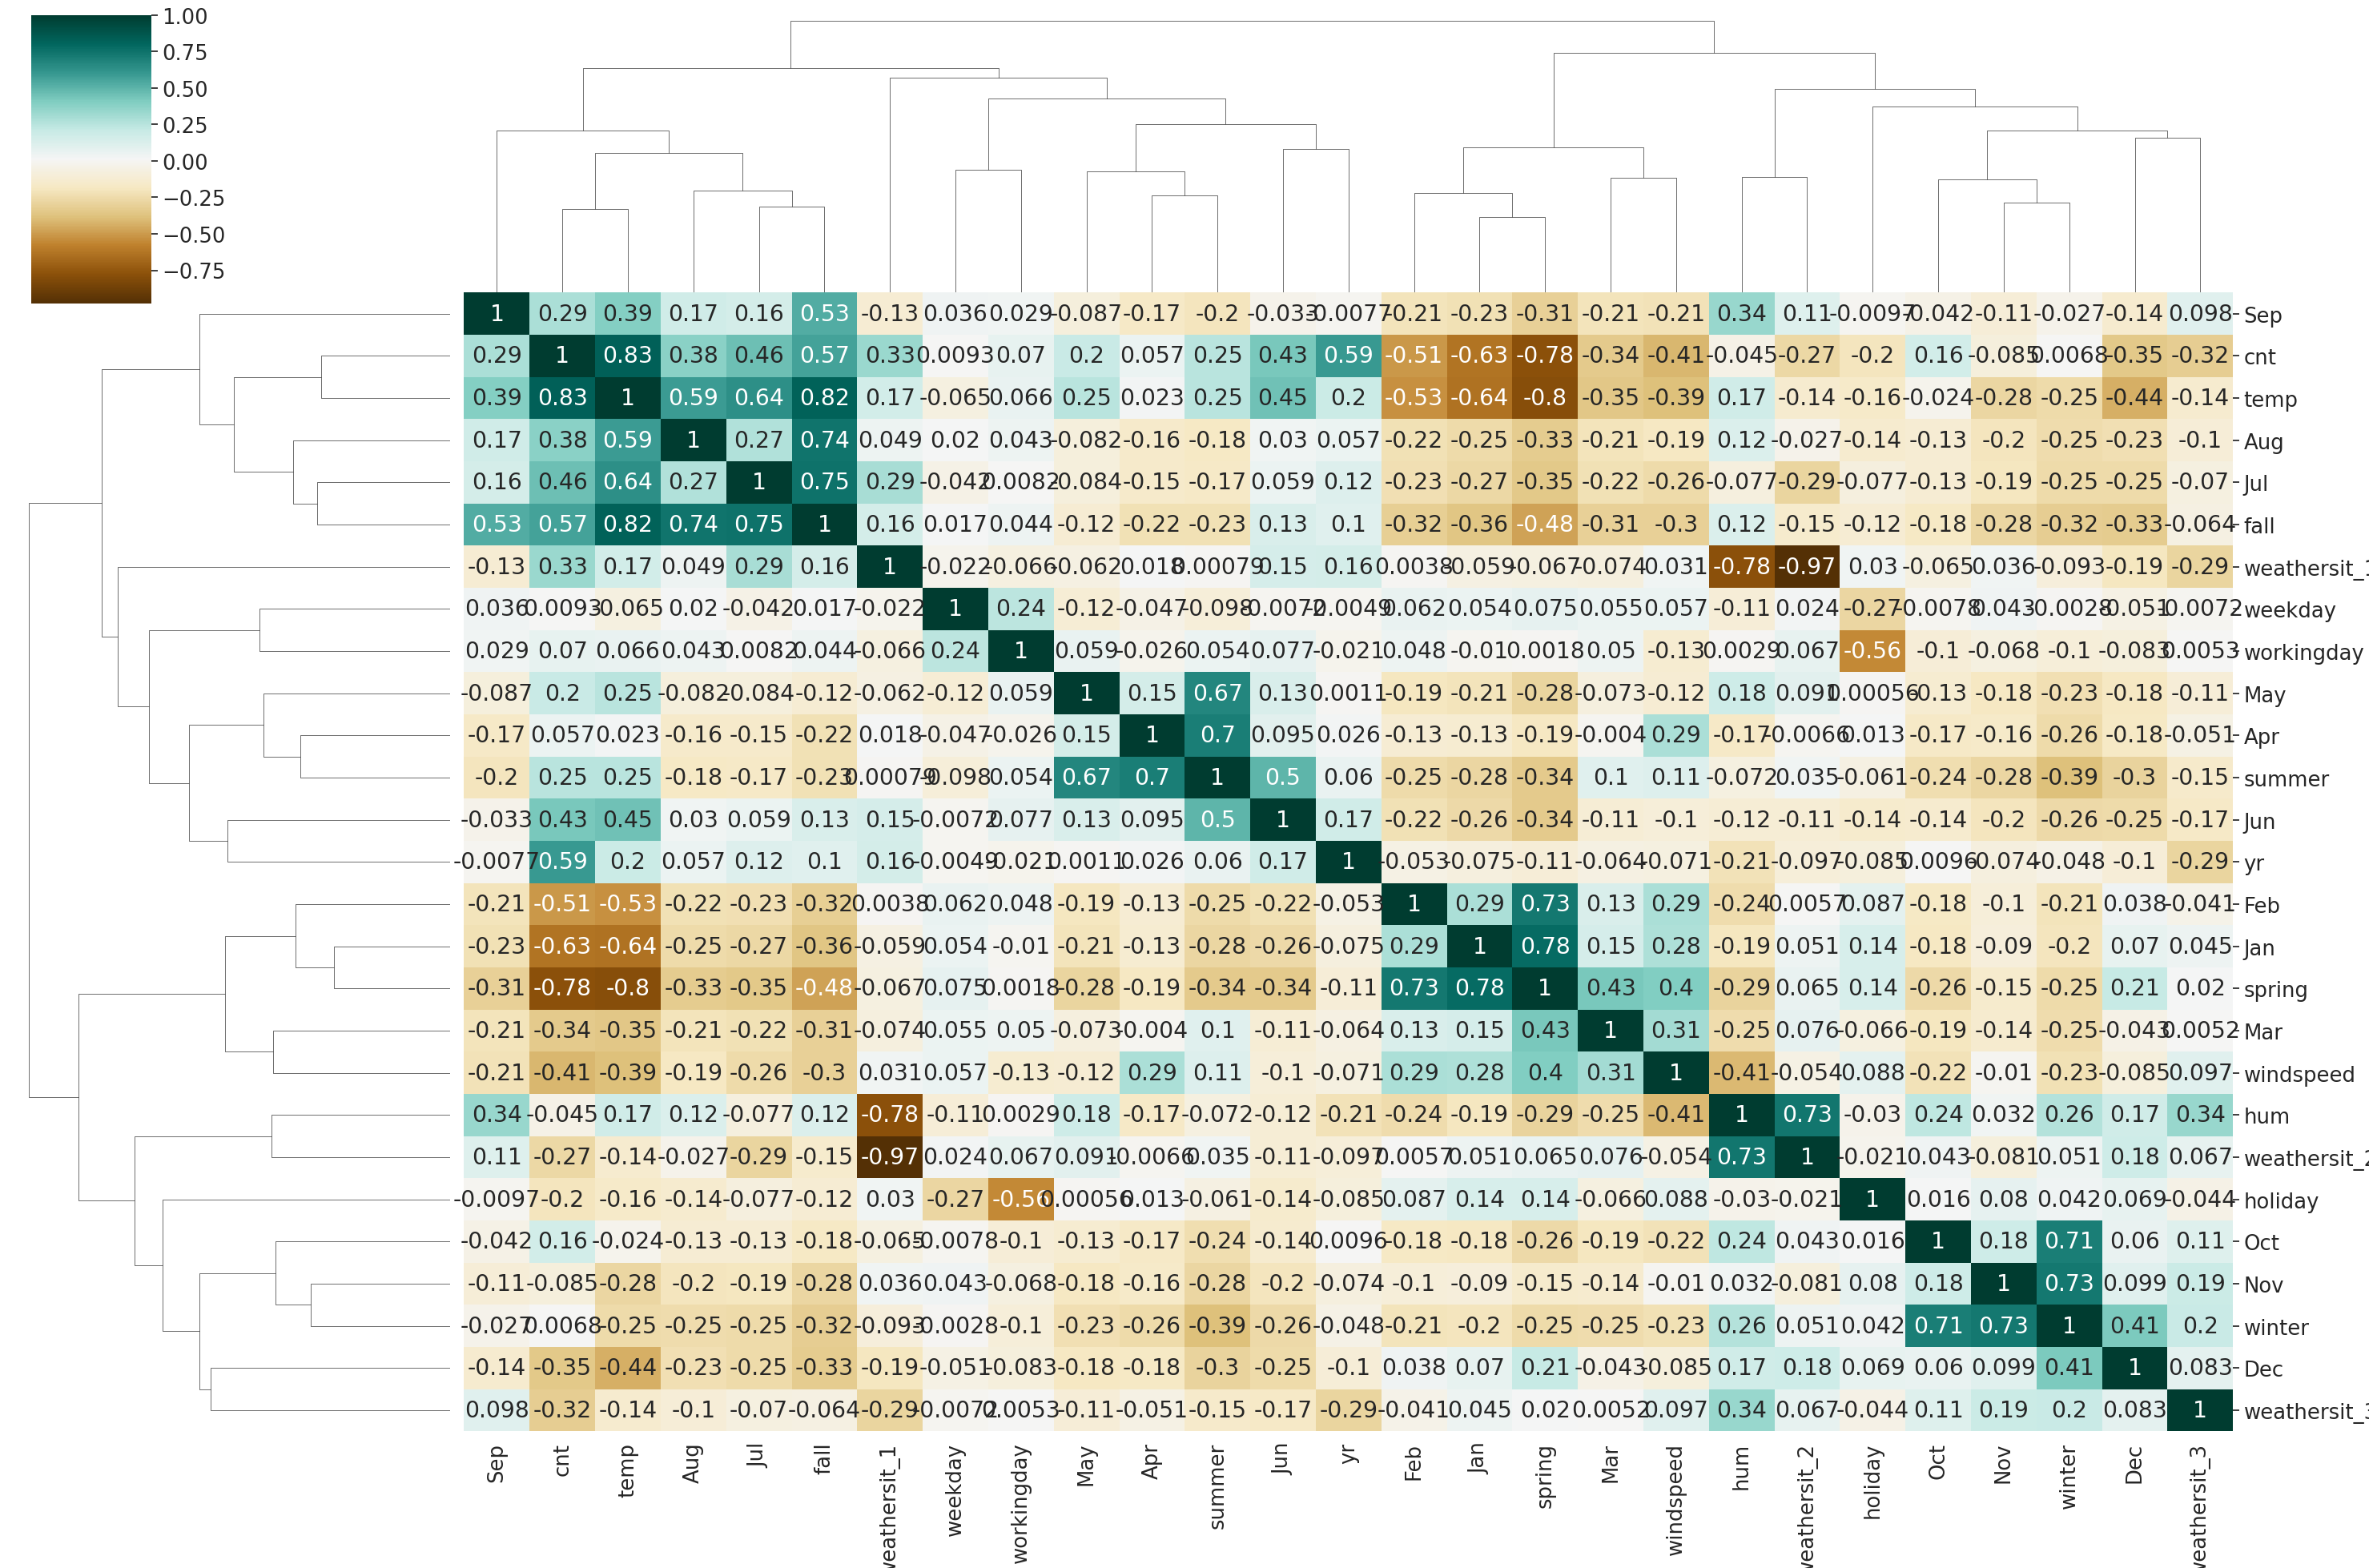

<Figure size 400x200 with 0 Axes>

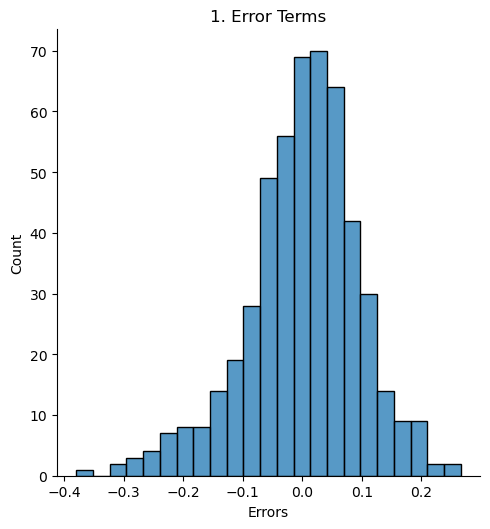

Analysis 2. Independence of residuals 
 durbin_watson :  2.1349355477087633
Analysis 3 : Homoscedasticity : 
 Should not see any patterns in below scatterplot..


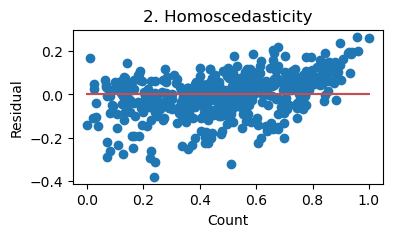

       Features   VIF
1          temp  3.74
2     windspeed  3.48
0            yr  1.99
3        summer  1.63
5  weathersit_2  1.48
4        winter  1.37
7           Sep  1.19
6  weathersit_3  1.07


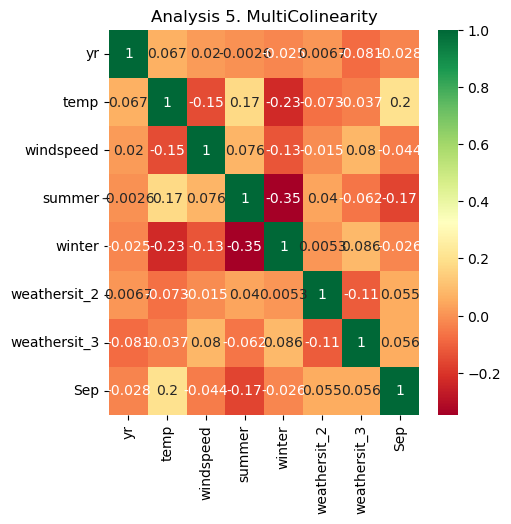

<Figure size 500x500 with 0 Axes>

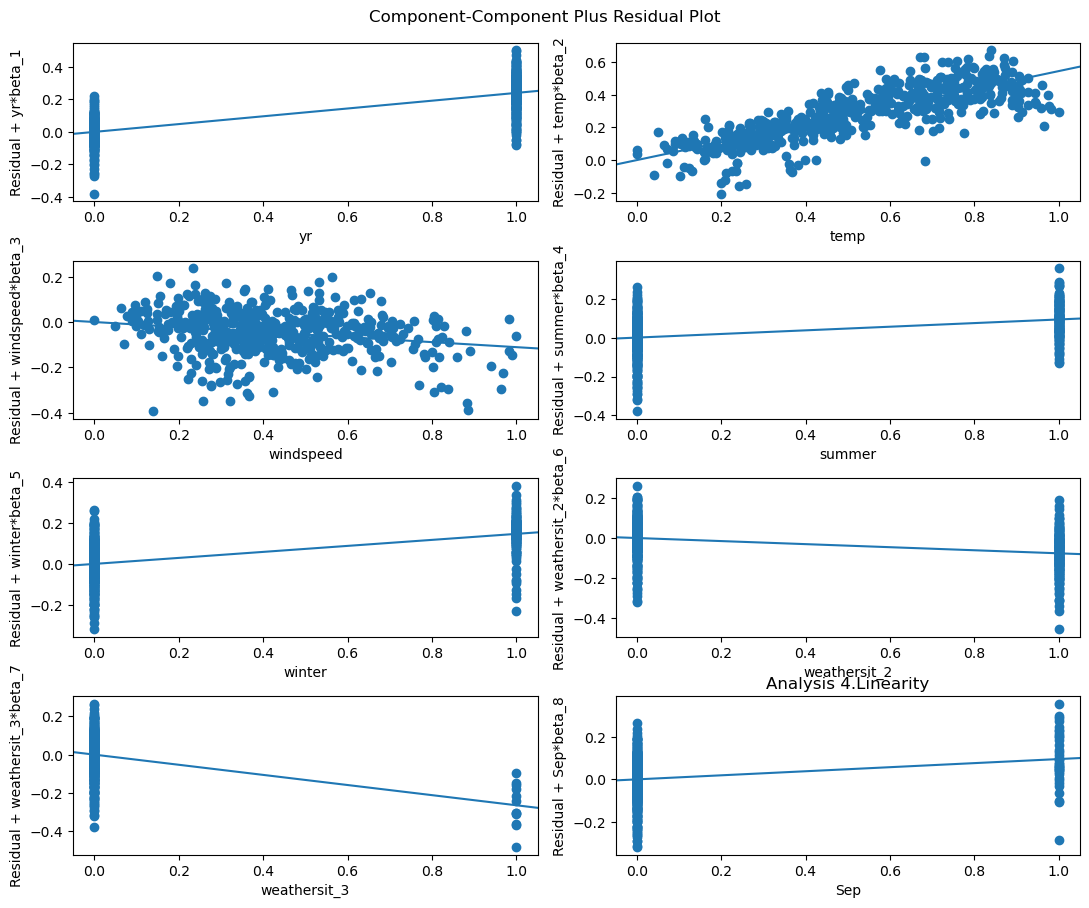

In [76]:
# residual analysis for model 1
residualAnalysis(lr_model1, X_train1, y_train1)

Analysis 1: Residual Plot : 
 Values Should be normally distributed


<Figure size 400x200 with 0 Axes>

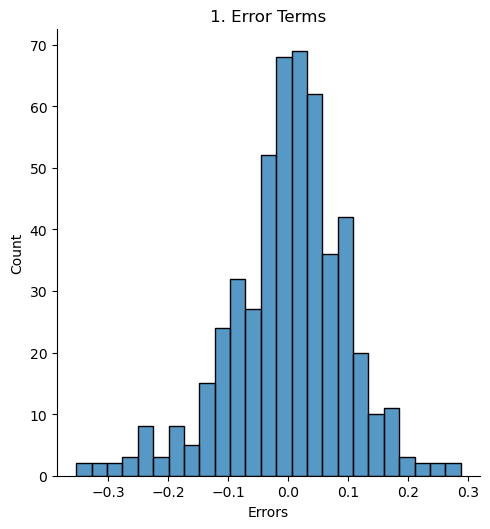

Analysis 2. Independence of residuals 
 durbin_watson :  2.1283200113170926
Analysis 3 : Homoscedasticity : 
 Should not see any patterns in below scatterplot..


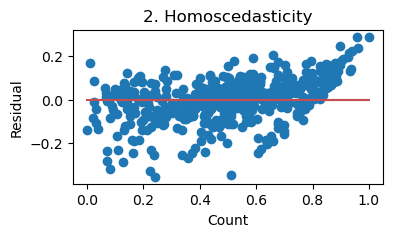

       Features   VIF
2     windspeed  4.80
1          temp  4.52
5  weathersit_1  2.81
0            yr  2.07
3        spring  1.83
4        winter  1.40
6  weathersit_3  1.09


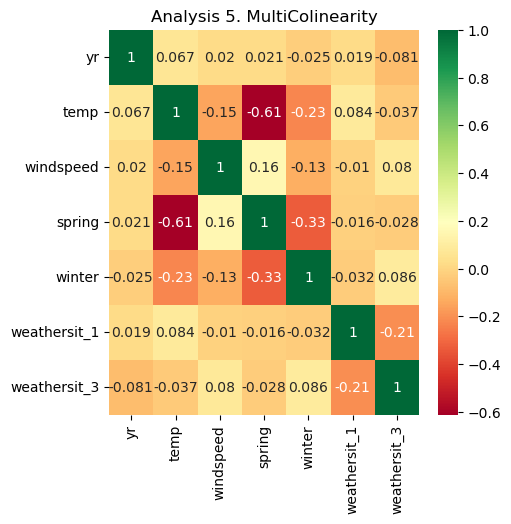

<Figure size 500x500 with 0 Axes>

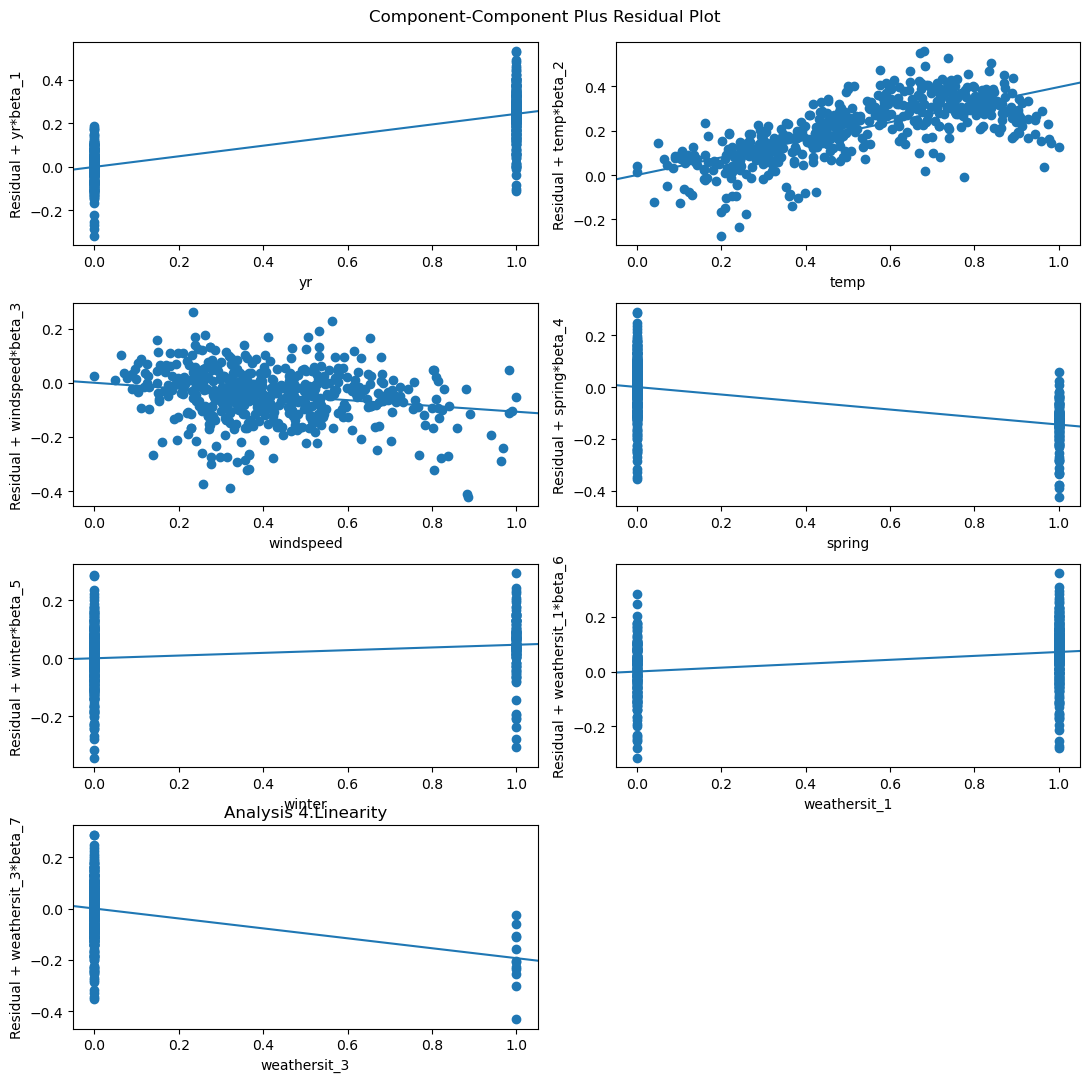

In [77]:
# residual analysis for model 2
residualAnalysis(lr_model2, X_train2, y_train2)

Analysis 1: Residual Plot : 
 Values Should be normally distributed


<Figure size 400x200 with 0 Axes>

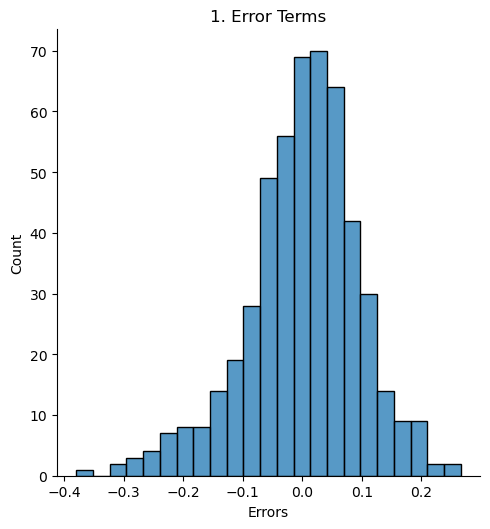

Analysis 2. Independence of residuals 
 durbin_watson :  2.134935547708763
Analysis 3 : Homoscedasticity : 
 Should not see any patterns in below scatterplot..


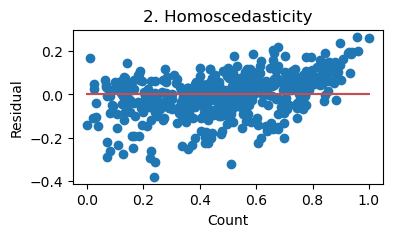

       Features   VIF
1          temp  4.29
2     windspeed  3.67
5  weathersit_1  2.69
0            yr  1.99
3        summer  1.61
4        winter  1.37
7           Sep  1.19
6  weathersit_3  1.09


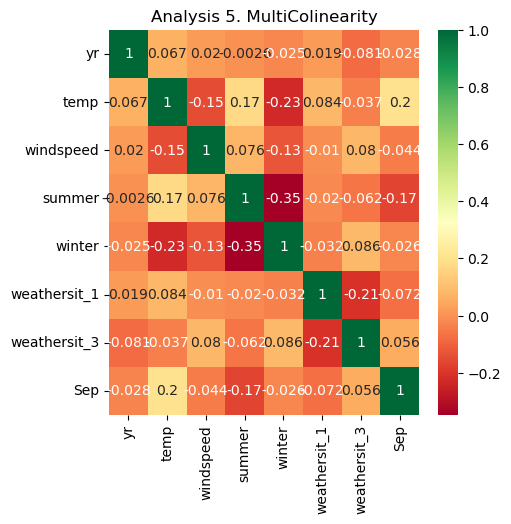

<Figure size 500x500 with 0 Axes>

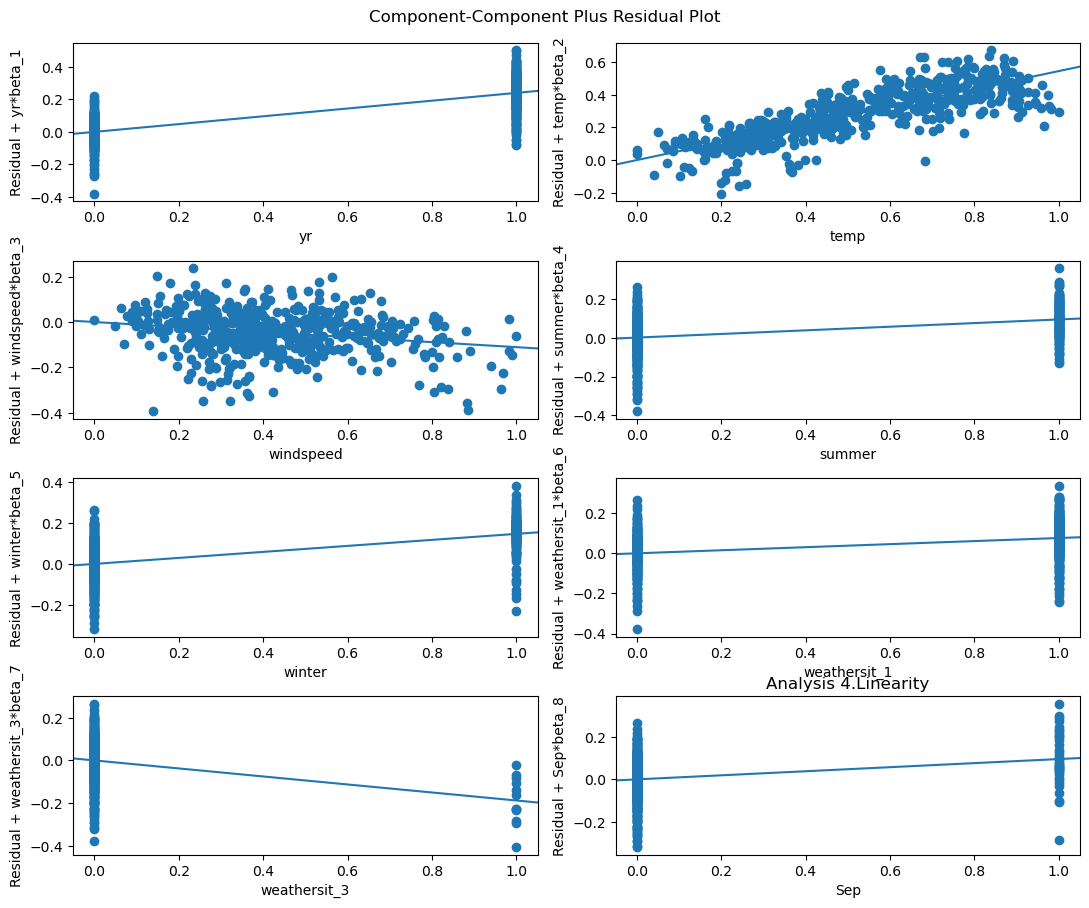

In [78]:
# residual analysis for model 3
residualAnalysis(lr_model3, X_train3, y_train3)

## Step 5 : Prediction and evaluation on the test set

In [79]:
y_test, X_test = df_test.pop('cnt'), df_test

In [80]:
def predict(model, train_data, test_data):
    # add constant
    X_test_sm = test_data[train_data.columns]
    X_test_sm = sm.add_constant(X_test_sm)
    X_test_sm
    # do predictions
    y_test_pred = model.predict(X_test_sm)
    return y_test_pred
def evaluater2score(y_test_pred, y_true):
    #calculate r2_score
    return round(r2_score(y_true=y_true, y_pred=y_test_pred), 4)

# Calculating Adjusted-R^2 value for the test dataset
def evaluate_adjustedr2(r2, test_data):
    adjusted_r2 = round(1-(1-r2)*(test_data.shape[0]-1)/(test_data.shape[0]-test_data.shape[1]-1),4)
    return round(adjusted_r2, 4)

def plotActual2Prediction(y_test_pred, y_true):
    # Visualizing the fit on the test data
    # plotting a Regression plot
    plt.figure(figsize=(5, 4))
    sns.regplot(x=y_true, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.title('y_true vs y_test_pred', fontsize=20)
    plt.xlabel('y_true', fontsize=18)
    plt.ylabel('y_test_pred', fontsize=16)
    plt.show()
    
def evaluateTestSet(model, train_data, test_data, y_true):
    y_test_pred = predict(model, train_data, test_data)
    r2_score = evaluater2score(y_test_pred, y_true)
    print('r2score : ',r2_score)
    print('adjusted r2 : ', evaluate_adjustedr2(r2_score, test_data))
    plotActual2Prediction(y_test_pred, y_true)                                      

r2score :  0.8092
adjusted r2 :  0.7824


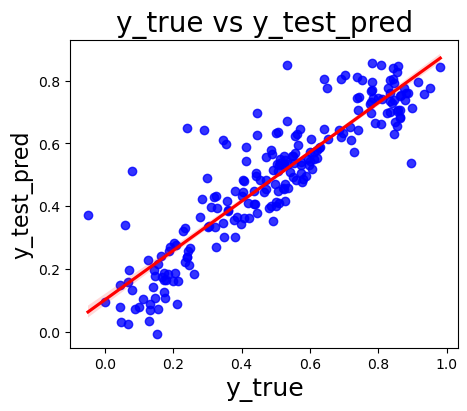

In [81]:
evaluateTestSet(lr_model1, X_train1, X_test, y_test)

r2score :  0.8011
adjusted r2 :  0.7731


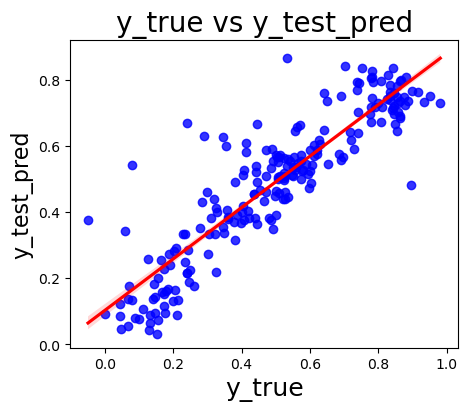

In [82]:
evaluateTestSet(lr_model2, X_train2, X_test, y_test)

r2score :  0.8092
adjusted r2 :  0.7824


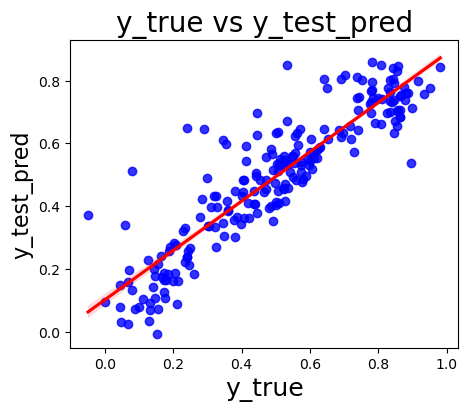

In [83]:
evaluateTestSet(lr_model3, X_train3, X_test, y_test)

## Step 6 : Summary 

## Appendix A : RFE : Gradual feature removal steps done

In [84]:
X_train2 = X_train

In [85]:
lr_model2 = buildAndTrainModel(list(X_train2.columns), X_train2, y_train2)
calculateVIF(X_train2)

(const           0.133830
yr              0.241311
holiday        -0.046638
weekday         0.008054
workingday      0.019260
temp            0.400694
hum            -0.159151
windspeed      -0.136333
day_of_month   -0.000635
fall            0.019641
spring         -0.061627
summer          0.068949
winter          0.106866
weathersit_1    0.139346
weathersit_2    0.085616
weathersit_3   -0.091132
Apr             0.000825
Aug             0.027930
Dec            -0.031396
Feb            -0.012932
Jan            -0.035582
Jul             0.006352
Jun             0.015357
Mar             0.001779
May             0.019865
Nov            -0.017383
Oct             0.059491
Sep             0.099524
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.84

In [86]:
#X_try= X_train2.drop(['holiday', 'winter','Sep'], axis=1)
buildAndTrainModel(list(X_train2.columns), X_train2, y_train2)
calculateVIF(X_train2)

(const           0.133830
yr              0.241311
holiday        -0.046638
weekday         0.008054
workingday      0.019260
temp            0.400694
hum            -0.159151
windspeed      -0.136333
day_of_month   -0.000635
fall            0.019641
spring         -0.061627
summer          0.068949
winter          0.106866
weathersit_1    0.139346
weathersit_2    0.085616
weathersit_3   -0.091132
Apr             0.000825
Aug             0.027930
Dec            -0.031396
Feb            -0.012932
Jan            -0.035582
Jul             0.006352
Jun             0.015357
Mar             0.001779
May             0.019865
Nov            -0.017383
Oct             0.059491
Sep             0.099524
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.84

In [87]:
rfe = runRFE(22, X_train2, y_train2)
X_train2 = removeUnsupportedColumns(rfe, X_train2)

Fitting estimator with 27 features.
Column: yr, Selected True, Rank: 1.000
Column: holiday, Selected True, Rank: 1.000
Column: weekday, Selected False, Rank: 2.000
Column: workingday, Selected True, Rank: 1.000
Column: temp, Selected True, Rank: 1.000
Column: hum, Selected True, Rank: 1.000
Column: windspeed, Selected True, Rank: 1.000
Column: day_of_month, Selected False, Rank: 2.000
Column: fall, Selected True, Rank: 1.000
Column: spring, Selected True, Rank: 1.000
Column: summer, Selected True, Rank: 1.000
Column: winter, Selected True, Rank: 1.000
Column: weathersit_1, Selected True, Rank: 1.000
Column: weathersit_2, Selected True, Rank: 1.000
Column: weathersit_3, Selected True, Rank: 1.000
Column: Apr, Selected True, Rank: 1.000
Column: Aug, Selected True, Rank: 1.000
Column: Dec, Selected True, Rank: 1.000
Column: Feb, Selected True, Rank: 1.000
Column: Jan, Selected True, Rank: 1.000
Column: Jul, Selected False, Rank: 2.000
Column: Jun, Selected False, Rank: 2.000
Column: Mar, 

In [88]:
#X_train1 = X_train1
buildAndTrainModel(list(X_train2.columns), X_train2, y_train2)
calculateVIF(X_train2)

(const           0.160596
yr              0.241663
holiday        -0.054633
workingday      0.022418
temp            0.392236
hum            -0.175579
windspeed      -0.136579
fall            0.023097
spring         -0.052158
summer          0.078150
winter          0.111507
weathersit_1    0.145565
weathersit_2    0.095598
weathersit_3   -0.080568
Apr            -0.018805
Aug             0.019296
Dec            -0.049624
Feb            -0.032228
Jan            -0.056410
Mar            -0.018592
Nov            -0.029308
Oct             0.047809
Sep             0.092690
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     135.0
Date:                Tue, 07 Feb 2023   Prob

In [89]:
rfe = runRFE(20, X_train2, y_train2)
X_train2 = removeUnsupportedColumns(rfe, X_train2)

Fitting estimator with 22 features.
Column: yr, Selected True, Rank: 1.000
Column: holiday, Selected True, Rank: 1.000
Column: workingday, Selected True, Rank: 1.000
Column: temp, Selected True, Rank: 1.000
Column: hum, Selected True, Rank: 1.000
Column: windspeed, Selected True, Rank: 1.000
Column: fall, Selected False, Rank: 2.000
Column: spring, Selected True, Rank: 1.000
Column: summer, Selected True, Rank: 1.000
Column: winter, Selected True, Rank: 1.000
Column: weathersit_1, Selected True, Rank: 1.000
Column: weathersit_2, Selected True, Rank: 1.000
Column: weathersit_3, Selected True, Rank: 1.000
Column: Apr, Selected True, Rank: 1.000
Column: Aug, Selected True, Rank: 1.000
Column: Dec, Selected True, Rank: 1.000
Column: Feb, Selected True, Rank: 1.000
Column: Jan, Selected True, Rank: 1.000
Column: Mar, Selected False, Rank: 2.000
Column: Nov, Selected True, Rank: 1.000
Column: Oct, Selected True, Rank: 1.000
Column: Sep, Selected True, Rank: 1.000


In [90]:
#X_train1 = X_train
buildAndTrainModel(list(X_train2.columns), X_train2, y_train2)
calculateVIF(X_train2)

(const           0.168488
yr              0.241314
holiday        -0.054946
workingday      0.021976
temp            0.407319
hum            -0.176209
windspeed      -0.137509
spring         -0.083852
summer          0.055821
winter          0.082789
weathersit_1    0.148211
weathersit_2    0.098177
weathersit_3   -0.077900
Apr            -0.013264
Aug             0.020843
Dec            -0.033708
Feb            -0.013811
Jan            -0.036898
Nov            -0.015386
Oct             0.059378
Sep             0.097345
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     142.3
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          1.80e-185
Time:          

In [91]:
rfe = runRFE(17, X_train2, y_train2)
X_train2 = removeUnsupportedColumns(rfe, X_train2)

Fitting estimator with 20 features.
Column: yr, Selected True, Rank: 1.000
Column: holiday, Selected True, Rank: 1.000
Column: workingday, Selected True, Rank: 1.000
Column: temp, Selected True, Rank: 1.000
Column: hum, Selected True, Rank: 1.000
Column: windspeed, Selected True, Rank: 1.000
Column: spring, Selected True, Rank: 1.000
Column: summer, Selected True, Rank: 1.000
Column: winter, Selected True, Rank: 1.000
Column: weathersit_1, Selected True, Rank: 1.000
Column: weathersit_2, Selected True, Rank: 1.000
Column: weathersit_3, Selected True, Rank: 1.000
Column: Apr, Selected False, Rank: 2.000
Column: Aug, Selected True, Rank: 1.000
Column: Dec, Selected True, Rank: 1.000
Column: Feb, Selected False, Rank: 2.000
Column: Jan, Selected True, Rank: 1.000
Column: Nov, Selected False, Rank: 2.000
Column: Oct, Selected True, Rank: 1.000
Column: Sep, Selected True, Rank: 1.000


In [92]:
buildAndTrainModel(list(X_train2.columns), X_train2, y_train2)
calculateVIF(X_train2)

(const           0.162142
yr              0.240795
holiday        -0.057252
workingday      0.021513
temp            0.421245
hum            -0.179875
windspeed      -0.140036
spring         -0.084442
summer          0.055804
winter          0.076898
weathersit_1    0.145440
weathersit_2    0.096357
weathersit_3   -0.079654
Aug             0.022309
Dec            -0.021170
Jan            -0.026180
Oct             0.070887
Sep             0.102005
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.6
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          1.39e-188
Time:                        16:37:37   Log-Likelihood:                 511.73
No. Observa

In [93]:
#X_train1.drop(['hum'], axis=1, inplace=True)
rfe = runRFE(15, X_train2, y_train2)
X_train2 = removeUnsupportedColumns(rfe, X_train2)

Fitting estimator with 17 features.
Column: yr, Selected True, Rank: 1.000
Column: holiday, Selected True, Rank: 1.000
Column: workingday, Selected False, Rank: 2.000
Column: temp, Selected True, Rank: 1.000
Column: hum, Selected True, Rank: 1.000
Column: windspeed, Selected True, Rank: 1.000
Column: spring, Selected True, Rank: 1.000
Column: summer, Selected True, Rank: 1.000
Column: winter, Selected True, Rank: 1.000
Column: weathersit_1, Selected True, Rank: 1.000
Column: weathersit_2, Selected True, Rank: 1.000
Column: weathersit_3, Selected True, Rank: 1.000
Column: Aug, Selected True, Rank: 1.000
Column: Dec, Selected False, Rank: 2.000
Column: Jan, Selected True, Rank: 1.000
Column: Oct, Selected True, Rank: 1.000
Column: Sep, Selected True, Rank: 1.000


In [94]:
buildAndTrainModel(list(X_train2.columns), X_train2, y_train2)
calculateVIF(X_train2)

(const           0.172019
yr              0.239802
holiday        -0.072805
temp            0.437304
hum            -0.193213
windspeed      -0.142628
spring         -0.079590
summer          0.060604
winter          0.077077
weathersit_1    0.145893
weathersit_2    0.099117
weathersit_3   -0.072991
Aug             0.023389
Jan            -0.019871
Oct             0.075293
Sep             0.106470
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.2
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          2.85e-189
Time:                        16:37:37   Log-Likelihood:                 507.92
No. Observations:                 510   AIC:                 

In [95]:
rfe = runRFE(12, X_train2, y_train2)
X_train2 = removeUnsupportedColumns(rfe, X_train2)

Fitting estimator with 15 features.
Column: yr, Selected True, Rank: 1.000
Column: holiday, Selected True, Rank: 1.000
Column: temp, Selected True, Rank: 1.000
Column: hum, Selected True, Rank: 1.000
Column: windspeed, Selected True, Rank: 1.000
Column: spring, Selected True, Rank: 1.000
Column: summer, Selected True, Rank: 1.000
Column: winter, Selected True, Rank: 1.000
Column: weathersit_1, Selected True, Rank: 1.000
Column: weathersit_2, Selected False, Rank: 2.000
Column: weathersit_3, Selected True, Rank: 1.000
Column: Aug, Selected False, Rank: 2.000
Column: Jan, Selected False, Rank: 2.000
Column: Oct, Selected True, Rank: 1.000
Column: Sep, Selected True, Rank: 1.000


In [96]:
buildAndTrainModel(list(X_train2.columns), X_train2, y_train2)
calculateVIF(X_train2)

(const           0.275292
yr              0.239035
holiday        -0.074400
temp            0.445045
hum            -0.193328
windspeed      -0.140295
spring         -0.092705
summer          0.052077
winter          0.071185
weathersit_1    0.045601
weathersit_3   -0.174976
Oct             0.073462
Sep             0.098578
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.4
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          5.38e-191
Time:                        16:37:37   Log-Likelihood:                 506.43
No. Observations:                 510   AIC:                            -986.9
Df Residuals:                     497   BIC:             

In [97]:
X_train2 = X_train2.drop(['hum'], axis=1)
rfe = runRFE(10, X_train2, y_train2)
X_train2 = removeUnsupportedColumns(rfe, X_train2)

Fitting estimator with 11 features.
Column: yr, Selected True, Rank: 1.000
Column: holiday, Selected True, Rank: 1.000
Column: temp, Selected True, Rank: 1.000
Column: windspeed, Selected True, Rank: 1.000
Column: spring, Selected True, Rank: 1.000
Column: summer, Selected False, Rank: 2.000
Column: winter, Selected True, Rank: 1.000
Column: weathersit_1, Selected True, Rank: 1.000
Column: weathersit_3, Selected True, Rank: 1.000
Column: Oct, Selected True, Rank: 1.000
Column: Sep, Selected True, Rank: 1.000


In [98]:
buildAndTrainModel(list(X_train2.columns), X_train2, y_train2)
calculateVIF(X_train2)

(const           0.204886
yr              0.245479
holiday        -0.074454
temp            0.356762
windspeed      -0.106037
spring         -0.151877
winter          0.014274
weathersit_1    0.076215
weathersit_3   -0.200433
Oct             0.078260
Sep             0.068580
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     245.4
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          1.72e-185
Time:                        16:37:37   Log-Likelihood:                 487.70
No. Observations:                 510   AIC:                            -953.4
Df Residuals:                     499   BIC:                            -906.8
Df Model:                   

In [99]:
rfe = runRFE(8, X_train2, y_train2)
X_train2 = removeUnsupportedColumns(rfe, X_train2)

Fitting estimator with 10 features.
Column: yr, Selected True, Rank: 1.000
Column: holiday, Selected True, Rank: 1.000
Column: temp, Selected True, Rank: 1.000
Column: windspeed, Selected True, Rank: 1.000
Column: spring, Selected True, Rank: 1.000
Column: winter, Selected False, Rank: 2.000
Column: weathersit_1, Selected True, Rank: 1.000
Column: weathersit_3, Selected True, Rank: 1.000
Column: Oct, Selected True, Rank: 1.000
Column: Sep, Selected False, Rank: 2.000


In [100]:
#X_train1 = X_train
lr_model2 = buildAndTrainModel(list(X_train2.columns), X_train2, y_train2)
calculateVIF(X_train2)

(const           0.222553
yr              0.244840
holiday        -0.070246
temp            0.352280
windspeed      -0.111218
spring         -0.164301
weathersit_1    0.073623
weathersit_3   -0.192900
Oct             0.080519
dtype: float64, <class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     294.9
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          4.72e-184
Time:                        16:37:37   Log-Likelihood:                 478.47
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     501   BIC:                            -900.8
Df Model:                           8                                         

In [101]:
## Probable Model 2
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     294.9
Date:                Tue, 07 Feb 2023   Prob (F-statistic):          4.72e-184
Time:                        16:37:37   Log-Likelihood:                 478.47
No. Observations:                 510   AIC:                            -938.9
Df Residuals:                     501   BIC:                            -900.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2226      0.019     11.726      0.000       0.185       0.260
yr               0.2448      0.009     28.679      0.000       0.228       0.262
holiday         -0.0702      0.022     -3.136      0.002      -0.114      -0.026
temp             0.3523      0.023     15.435      0.000       0.307       0.397
windspeed       -0.1112      0.023     -4.837      0.000      -0.156      -0.066
spring          -0.1643      0.013    -12.759      0.000      -0.190      -0.139
weathersit_1     0.0736      0.009      8.157      0.000       0.056       0.091
weathersit_3    -0.1929      0.029     -6.703      0.000      -0.249      -0.136
Oct              0.0805      0.015      5.248      0.000       0.050       0.111
==============================================================================
Omnibus:                       32.822   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.584
Skew:                          -0.521   Prob(JB):                     2.08e-10
Kurtosis:                       4.006   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [102]:
lr_model1.params

const           0.093700
yr              0.240337
temp            0.545839
windspeed      -0.111067
summer          0.093180
winter          0.146942
weathersit_2   -0.076342
weathersit_3   -0.264067
Sep             0.095763
dtype: float64